### Problem Statement-
Understanding the problem statement is the first and foremost step. This would help you give an intuition of what you will face ahead of time. Let us see the problem statement -

The objective of this task is to built a classification model to predict whether a loan would be approved or not. 
In this classification problem, we have to predict discrete values based on a given set of independent variable(s).

Classification can be of two types:

1. Binary Classification : In this classification we have to predict either of the two given classes. For example: classifying the gender as male or female, predicting the result as win or loss, etc.
2. Multiclass Classification : Here we have to classify the data into three or more classes. For example: classifying a movie's genre as comedy, action or romantic, classify fruits as oranges, apples, or pears, etc.

###### Hypothesis Generation
It involves understanding the problem in detail by brainstorming as many factors as possible which can impact the outcome.

Below are some factors which I think can effect the Loan Approval (dependent variable for this loan prediction problems):

1. Salary: Applicants with high income should have more chances of loan approval.
2. Previous history: Applicants who have repayed their previous debts should have higher chances of loan approval.
3. Loan amount: Loan approval should also depend on the loan amount. If the loan amount is less, chances of loan approval should be high.
4. Loan term: Loan for less time period and less amount should have higher chances of approval.
5. EMI: Lesser the amount to be paid monthly to repay the loan, higher the chances of loan approval.

There can be many other factors like No. of Dependents, Employment, Education, Marital Status,

In [5]:
# Loading packages

import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import warnings                              # to ignore warnings
warnings.filterwarnings('ignore')

In [6]:
# data
train = pd.read_csv("train_u6lujuX_CVtuZ9i.csv")
test = pd.read_csv('test_Y3wMUE5_7gLdaTN.csv')

In [7]:
# let's make copy of train and test data
train_orgiginal = train.copy()
test_original = test.copy()

In [15]:
# exploring the data
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
Loan_ID              614 non-null object
Gender               601 non-null object
Married              611 non-null object
Dependents           599 non-null object
Education            614 non-null object
Self_Employed        582 non-null object
ApplicantIncome      614 non-null int64
CoapplicantIncome    614 non-null float64
LoanAmount           592 non-null float64
Loan_Amount_Term     600 non-null float64
Credit_History       564 non-null float64
Property_Area        614 non-null object
Loan_Status          614 non-null object
dtypes: float64(4), int64(1), object(8)
memory usage: 62.4+ KB


In [16]:
train.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [17]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [18]:
train.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

we have 12 independent variables and 1 target variable, i.e. Loan_status

In [19]:
test.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')

we have 12 independent variables except target variable. We will predict the Loan_Status using the model built using the train data

In [21]:
# print data types for each variable
train.dtypes, test.dtypes

(Loan_ID               object
 Gender                object
 Married               object
 Dependents            object
 Education             object
 Self_Employed         object
 ApplicantIncome        int64
 CoapplicantIncome    float64
 LoanAmount           float64
 Loan_Amount_Term     float64
 Credit_History       float64
 Property_Area         object
 Loan_Status           object
 dtype: object, Loan_ID               object
 Gender                object
 Married               object
 Dependents            object
 Education             object
 Self_Employed         object
 ApplicantIncome        int64
 CoapplicantIncome      int64
 LoanAmount           float64
 Loan_Amount_Term     float64
 Credit_History       float64
 Property_Area         object
 dtype: object)

In [23]:
# lets look at the shapes
train.shape, test.shape

((614, 13), (367, 12))

### Exploratory Data Analysis (EDA) and Data Preprocessing

1. Target Variable - Loan Status
It's a categorical variable, let us look at its frequency table, percentage distribution and bar plot.

Frequency table of a variable will give us the count of each category in that variable.

In [24]:
train['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

In [25]:
# noralize can be set to True to print proportions instead of number
train['Loan_Status'].value_counts(normalize=True)

Y    0.687296
N    0.312704
Name: Loan_Status, dtype: float64

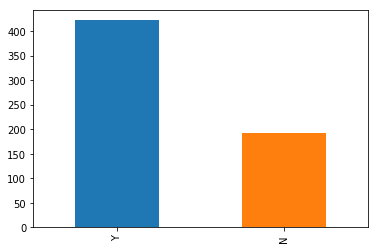

In [27]:
train['Loan_Status'].value_counts().plot.bar()

The loan of 422( 69% approx) people out of 614 was approved

Now lets visualize each variable separately.
* Categorical features: features have categories (Gender, Married, Self_Employed, Credit_History, Loan_Status)
* Ordinal features: Variables in categorical features having some order involved (Dependents, Education, Property_Area)
* Numerical features: features have numerical values (ApplicantIncome, CoapplicantIncome, LoanAmount, Loan_Amount_Term)

2. Independent Variable (Categorical)

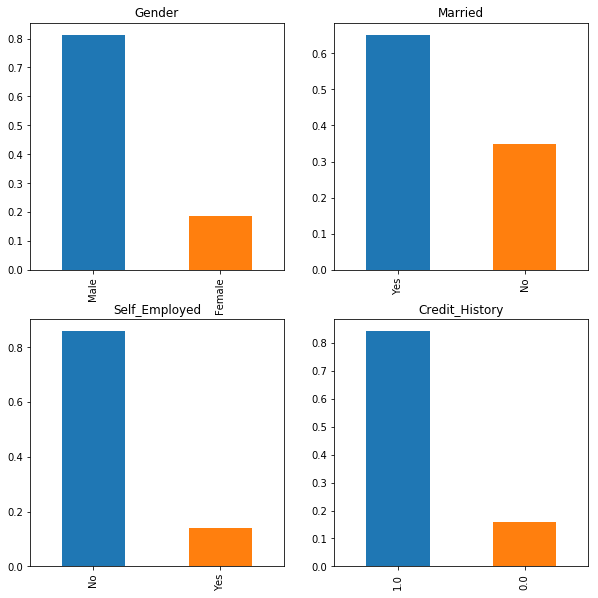

In [51]:
plt.figure(1)      #the first figure

plt.subplot(221)   
train['Gender'].value_counts(normalize=True).plot.bar(figsize=(10,10), title= "Gender")

plt.subplot(222)
train['Married'].value_counts(normalize=True).plot.bar(title="Married")

plt.subplot(223)
train['Self_Employed'].value_counts(normalize=True).plot.bar(title="Self_Employed")

plt.subplot(224)
train['Credit_History'].value_counts(normalize=True).plot.bar(title="Credit_History")

plt.show()


It can be inferred from the above bar plots that:

80% applicants in the dataset are male.
Around 65% of the applicants in the dataset are married.
Around 15% applicants in the dataset are self employed.
Around 85% applicants have repaid their debts.


3. Independent Variable (Ordinal)

In [52]:
train['Dependents'].value_counts()

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64